In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
A = 100
# データの範囲は、2<= data <= 220(含む)

def makesin_noise():
    period = np.random.randint(50, 100)# 周期
    A = np.random.randint(50,100)# 振幅
    sft = np.random.randint(period)
    x_lst = np.arange(period) - sft
    s = np.sin(2*np.pi*x_lst/period)
    snoise = s + 0.1*np.random.randn(period)
    snoise = (snoise * A).astype(np.int64)
    s = (s*A).astype(np.int64)
    snoise = snoise + A + 1
    s = s + A + 1
    snoise = np.clip(snoise, 2, 220)
    s = np.clip(s, 2, 220)
    return snoise, s

In [295]:
def check_test_data(train, test):
#     import pdb; pdb.set_trace()
    for t in test:
        if np.all(train==t):
            return False
    return True

def make_data(batch, train=True, test_lst=None):
#     np.random.seed(seed=32)
    src_lst = []
    tgt_lst = []
    # src_mask_lst = []
    # tgt_mask_lst = []
    len_lst = []
    max_len = 0
    count = 0
    while count<batch:
        snoise, s = makesin_noise()
        if train:# trainデータ作成時
            if not check_test_data(snoise, test_lst):
#                 print("this data was in test set")
                continue
        l = len(snoise)
        len_lst.append(l)
        if (l>max_len):
            max_len = l
        src_lst.append(snoise)
        tgt_lst.append(s)
        count += 1
    src = np.ones((batch, max_len))
    tgt = np.ones((batch, max_len + 1))
    tgt[:,0] = 1
    for i in range(batch):
        src[i, :len_lst[i]] = src_lst[i]
        tgt[i, 1:len_lst[i]+1] = tgt_lst[i]
    if train:
        return src, tgt
    else:
        return src, tgt, src_lst

157
2


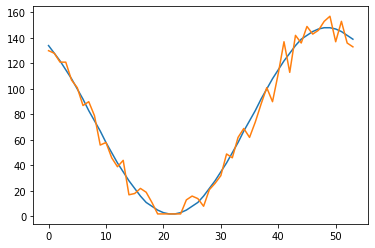

In [296]:
snoise, s = makesin_noise()
plt.plot(s)
plt.plot(snoise)
print(snoise.max())
print(snoise.min())

In [297]:
s.min()

2

/Users/yamamura/.pyenv/versions/miniforge3-4.9.2/envs/torchenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  after removing the cwd from sys.path.


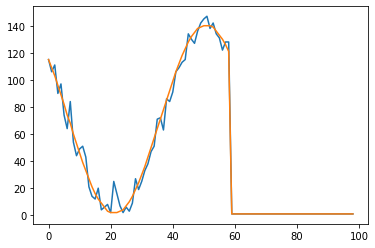

In [298]:
src_test, tgt_test, src_lst  = make_data(10, False)
# print(src_lst)
# import pdb; pdb.set_trace()
src, tgt = make_data(10, True, src_lst)

plt.plot(src[3])
plt.plot(tgt[3, 1:])

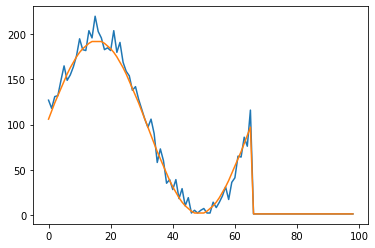

In [281]:
plt.plot(src[4])
plt.plot(tgt[4, 1:])

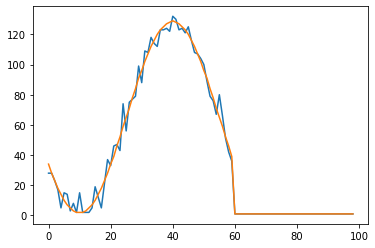

In [282]:
plt.plot(src[5])
plt.plot(tgt[5, 1:])

In [4]:
snoise, s = makesin_noise()

Text(0.5, 1.0, 'noise wave')

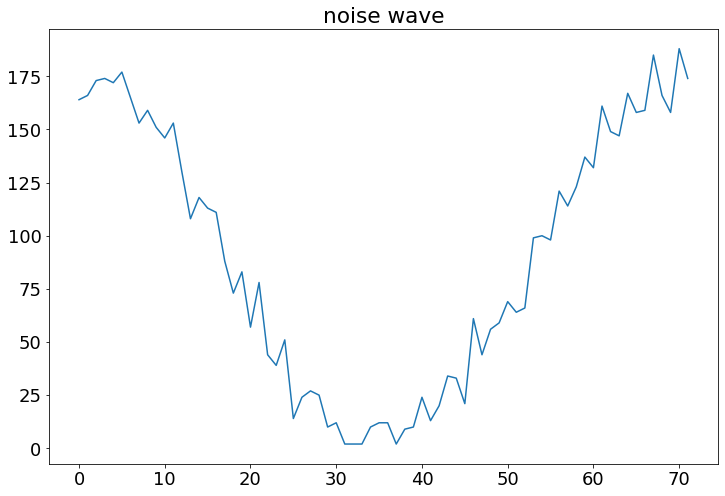

In [8]:
fig, ax = plt.subplots(figsize=(12,8))
plt.rcParams["font.size"] = 18
plt.plot(snoise)
plt.title("noise wave")

Text(0.5, 1.0, 'sin wave')

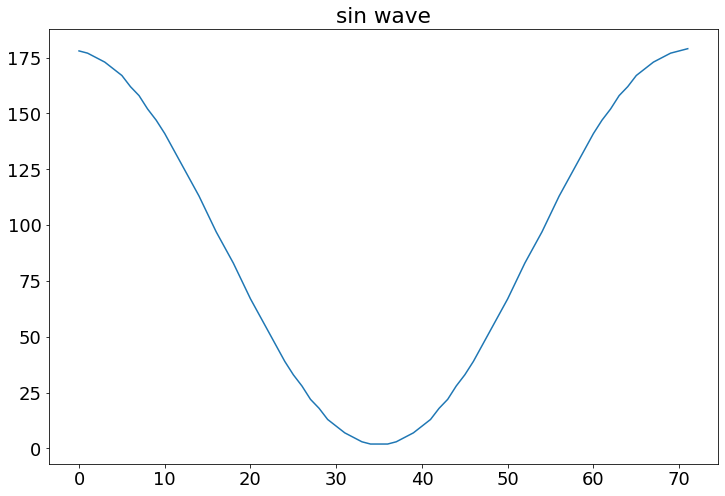

In [7]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(s)
plt.title("sin wave")